In [4]:
# First import the functions we will need
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
# This script requires TensorFlow 2 and Python 3.
# Este código realiza una verificación de compatibilidad antes de ejecutar un script en Python

# Verificación de la versión de TensorFlow
# Si no es la version2, lanza una excepción
if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

# Verificación de la versión de Python:
if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))


# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

In [6]:
# Este código implementa un modelo de regresión lineal que ajusta la ecuación 𝑦 = 𝑤𝑥 + 𝑏 para minimizar la diferencia con los valores
# reales. Se usa descenso de gradiente con TensorFlow para actualizar los valores de 𝑤 y 𝑏.

# Definir nuestra suposición inicial. Estos valores cambiarán durante el entrenamiento.
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our loss function
# * Calcula el error cuadrático medio (MSE, Mean Squared Error) entre los valores predichos (predicted_y) y los valores reales (target_y).
# * Mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima.
# * Cuanto menor sea el resultado, mejor ajustará el modelo.
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
# ✅ Usa tf.GradientTape() para calcular los gradientes del error respecto a 𝑤 y 𝑏.
# ✅ Ajusta los valores de 𝑤 y 𝑏 con descenso de gradiente, usando la tasa de aprendizaje (learning_rate).
# ✅ Cada iteración reduce la pérdida, haciendo que el modelo se ajuste mejor.
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    # Here is where you differentiate the model values with respect to the loss function
    # calcula las derivadas parciales de la función de pérdida con respecto a los parámetros w y b. Esto se basa en el concepto de
    # gradiente, que indica la dirección y magnitud del cambio necesario para minimizar el error del modelo.
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values based on the learning rate chosen
    # ✅ model.w → Representa el parámetro w de la ecuación y = wx + b, que el modelo ajusta durante el entrenamiento.
    # ✅ dw → Es el gradiente calculado con respecto a w, es decir, cuánto debe cambiar w para minimizar el error.
    # ✅ learning_rate → Define qué tan grande es el ajuste en cada iteración.
    # ✅ assign_sub() → Resta el valor especificado (learning_rate * dw) de model.w: w = w - learning_rate * dw
    model.w.assign_sub(learning_rate * dw)
    # idem para b
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Creación del modelo
# Define our simple linear regression model
# ✅ Se define una clase Model, con dos variables w y b (atributos).
# ✅ La función __call__ implementa la ecuación de una recta: y = w * x + b
# ✅ Cada vez que model(x) es llamado, devuelve la estimación de salida.
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

### Train our model

In [7]:
# Define our input data
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
# Contiene los valores esperados (Y) que queremos predecir.
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
# ✅ LEARNING_RATE define la velocidad de ajuste de los parámetros w y b durante el entrenamiento.
# ✅ Si el valor es muy grande, el modelo puede oscilar sin converger.
# ✅ Si el valor es muy pequeño, el aprendizaje será lento.
LEARNING_RATE=0.09

# Instantiate our model
# ✅ Se instancia la clase Model, que representa la ecuación y = wx + b con w y b como variables ajustables.
model = Model()

# Collect the history of w-values and b-values to plot later
# ✅ list_w y list_b almacenarán los valores de w y b en cada iteración.
# ✅ losses guardará los valores de error en cada época del entrenamiento.
# ✅ epochs = range(50) establece que el modelo entrenará por 50 iteraciones.
list_w, list_b = [], []
# Genera 50 numeros enteros desde 0 hasta 49
epochs = range(50)
losses = []

# Bucle de entrenamiento
for epoch in epochs:
  # ✅ Guarda los valores de w y b en cada iteración para observar cómo cambian.
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  # Llamado a la función de entrenamiento
  # ✅ Ejecuta la función train(), que ajusta los valores de w y b usando descenso de gradiente.
  # ✅ current_loss almacena el error después de actualizar los valores del modelo.
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print(f"Epoch {epoch:2d}: w={list_w[-1]:1.2f} b={list_b[-1]:1.2f}, "
        f"loss={current_loss:2.5f}")

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=-0.41 b=5.86, loss=27.47032
Epoch  2: w=-0.02 b=5.28, loss=22.43888
Epoch  3: w=0.16 b=4.69, loss=18.46284
Epoch  4: w=0.33 b=4.16, loss=15.19137
Epoch  5: w=0.49 b=3.68, loss=12.49958
Epoch  6: w=0.63 b=3.25, loss=10.28476
Epoch  7: w=0.76 b=2.85, loss=8.46238
Epoch  8: w=0.87 b=2.50, loss=6.96291
Epoch  9: w=0.98 b=2.17, loss=5.72914
Epoch 10: w=1.07 b=1.88, loss=4.71398
Epoch 11: w=1.16 b=1.61, loss=3.87870
Epoch 12: w=1.24 b=1.37, loss=3.19143
Epoch 13: w=1.31 b=1.15, loss=2.62593
Epoch 14: w=1.37 b=0.95, loss=2.16064
Epoch 15: w=1.43 b=0.77, loss=1.77779
Epoch 16: w=1.48 b=0.60, loss=1.46278
Epoch 17: w=1.53 b=0.45, loss=1.20359
Epoch 18: w=1.57 b=0.32, loss=0.99032
Epoch 19: w=1.61 b=0.20, loss=0.81484
Epoch 20: w=1.65 b=0.08, loss=0.67046
Epoch 21: w=1.68 b=-0.02, loss=0.55166
Epoch 22: w=1.71 b=-0.11, loss=0.45391
Epoch 23: w=1.74 b=-0.19, loss=0.37348
Epoch 24: w=1.76 b=-0.27, loss=0.30730
Epoch 25: w=1.79 b=-0.33, loss=0.2

### Plot our trained values over time

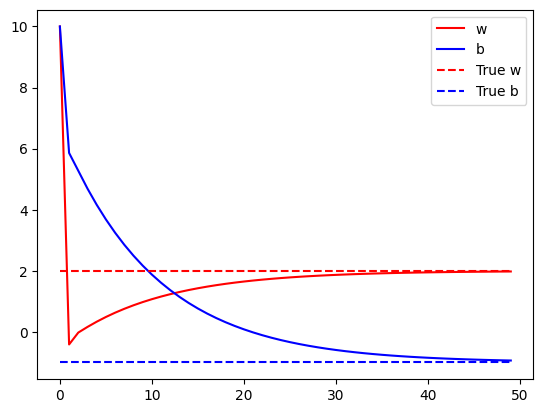

In [8]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()